### HW1 EDA

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import requests
import StringIO
import zipfile
import scipy.stats

In [7]:
url = 'http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip'
r=requests.get(url).content
s=StringIO.StringIO(r)
z=zipfile.ZipFile(s,'r')
z.namelist()

['SchoolsPlayers.csv',
 'SeriesPost.csv',
 'Teams.csv',
 'TeamsFranchises.csv',
 'TeamsHalf.csv',
 'AllstarFull.csv',
 'Appearances.csv',
 'AwardsManagers.csv',
 'AwardsPlayers.csv',
 'AwardsShareManagers.csv',
 'AwardsSharePlayers.csv',
 'Batting.csv',
 'BattingPost.csv',
 'Fielding.csv',
 'FieldingOF.csv',
 'FieldingPost.csv',
 'HallOfFame.csv',
 'Managers.csv',
 'ManagersHalf.csv',
 'Master.csv',
 'Pitching.csv',
 'PitchingPost.csv',
 'readme2013.txt',
 'Salaries.csv',
 'Schools.csv']

In [9]:
names=z.namelist()

In [13]:
salaries=pd.read_csv(z.open(names[names.index('Salaries.csv')]))
print salaries.shape
salaries.head()

(23956, 5)


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [14]:
teams = pd.read_csv(z.open(names[names.index('Teams.csv')]))
teams = teams[['yearID', 'teamID', 'W']]
print teams.shape
teams.head()

(2745, 3)


,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


In [16]:
totalSalaries = salaries.groupby(['yearID','teamID'], as_index=False).sum()
totalSalaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [17]:
# inner stands for taking intersection.
combined = pd.merge(totalSalaries, teams, how="inner", on=['yearID', 'teamID'])
combined.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


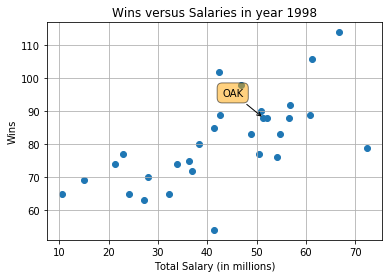

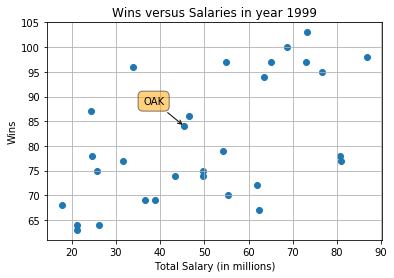

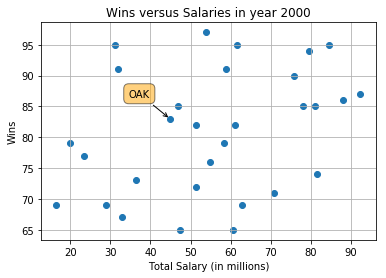

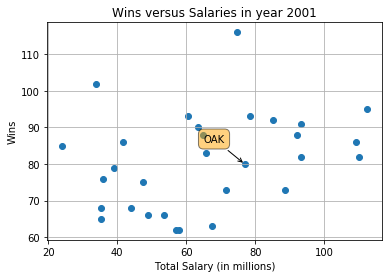

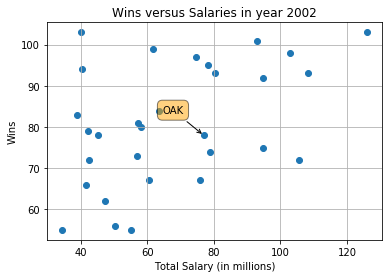

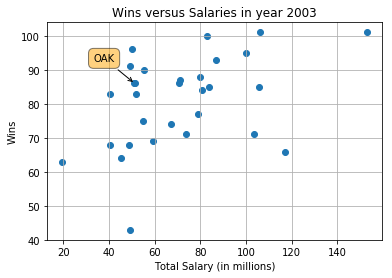

In [23]:
years = np.arange(1998, 2004)

for yr in years:
    df = combined[combined['yearID'] == yr]
    plt.scatter(df['salary'] / 1e6, df['W'])
    plt.title('Wins versus Salaries in year ' + str(yr))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    plt.grid()
    plt.annotate('OAK', xy = (df['salary'][df['teamID'] == teamName] / 1e6,  df['W'][df['teamID'] == teamName]),xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'orange', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))
    plt.show()

In [24]:
## Hence in year 2003 the team performed well with spending lesser money as compared to others.